<a href="https://colab.research.google.com/github/gladvikar/Shipment-Tracking-and-Inventory-Visibility-/blob/main/DBC_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STEP-1: MOUNT GOOGLE DRIVE**

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
print("drive mounted succesfully!!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive mounted succesfully!!


# **STEP-2: DATA EXTRACTION AND SETUP**

In [ ]:
# installing kaggle
!pip install kaggle

In [ ]:
# upload kaggle.json having your api key
from google.colab import files
files.upload()

In [ ]:
# add kaggle in your root directory
import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle. json')

In [ ]:
# setup kaggle file
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# setup local base directory
import os
base_dir = '/content/dog_breed_classification'
os.makedirs(f'{base_dir}/train', exist_ok=True)
os.makedirs(f'{base_dir}/test', exist_ok=True)

In [ ]:
# download data from kaggle competitions
!kaggle competitions download -c dog-breed-identification -p {base_dir}

 93% 640M/691M [00:07<00:01, 42.2MB/s]
100% 691M/691M [00:07<00:00, 94.6MB/s]


In [ ]:
# extract zip files

import zipfile

# Extract all zip files in the directory
for zip_file in os.listdir(base_dir):
    if zip_file.endswith('.zip'):
        with zipfile.ZipFile(os.path.join(base_dir, zip_file), 'r') as zip_ref:
            zip_ref.extractall(base_dir)
        os.remove(os.path.join(base_dir, zip_file))
        print("data unzipped correctly!!")


In [ ]:
# move the dataset to google drive

# 1. Define source (Colab) and destination (Drive) paths
src_path = '/content/dog_breed_classification'
dst_path = '/content/drive/MyDrive/dog_breed_classification'

# 2. If the folder already exists in Drive, remove it first (to avoid duplicates)
if os.path.exists(dst_path):
    !rm -rf /content/drive/MyDrive/dog_breed_classification

# 3. Move the entire folder to Drive
!mv {src_path} /content/drive/MyDrive/

# 4. Verify the structure in Drive
!ls -lh /content/drive/MyDrive/dog_breed_classification

total 25M
-rw-------+ 1 root root 471K Oct 12 14:22 labels.csv
-rw-------+ 1 root root  25M Oct 12 14:22 sample_submission.csv
drwx------+ 2 root root 4.0K Oct 12 14:22 test
drwx------+ 2 root root 4.0K Oct 12 14:31 train


In [ ]:
# view the moved files in drive


import os


path = "/content/drive/MyDrive/dog_breed_classification"

print("Files in dataset folder:\n", os.listdir(path))

Files in dataset folder:
 ['train', 'test', 'labels.csv', 'sample_submission.csv']


# **STEP-3: DATA EXPLORATION AND VISUALIZATION**

In [ ]:
# view the folder structure in drive

import os

def print_tree(startpath, max_files=2):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, "").count(os.sep)
        indent = "│   " * (level)
        print(f"{indent}├── {os.path.basename(root)}/")
        subindent = "│   " * (level + 1)
        for f in files[:max_files]:  # show only first few files
            print(f"{subindent}├── {f}")
        if len(files) > max_files:
            print(f"{subindent}└── ... ({len(files) - max_files} more files)")




# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

# Path to dataset (replace with your actual folder path)
data_dir = r"C:\Users\USER\Downloads\DBC_WORKSHOP\dataset"

# Load labels.csv
labels_df = pd.read_csv(f"{data_dir}/labels.csv")

# Basic inspection
print("First 5 rows:")
print(labels_df.head())

print("\nColumn names:")
print(labels_df.columns)

print("\nDataset shape:")
print(labels_df.shape)

In [ ]:
# plottings for per breed image count using matplotlib

# Count per breed
breed_counts = labels_df['breed'].value_counts()

# Bar chart (all breeds)
plt.figure(figsize=())  # make figure wider for readability

# Total unique breeds


First 5 rows:
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

Column names:
Index(['id', 'breed'], dtype='object')

Dataset shape:
(10222, 2)


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [ ]:
# describe data

In [ ]:
# show first 10 labels

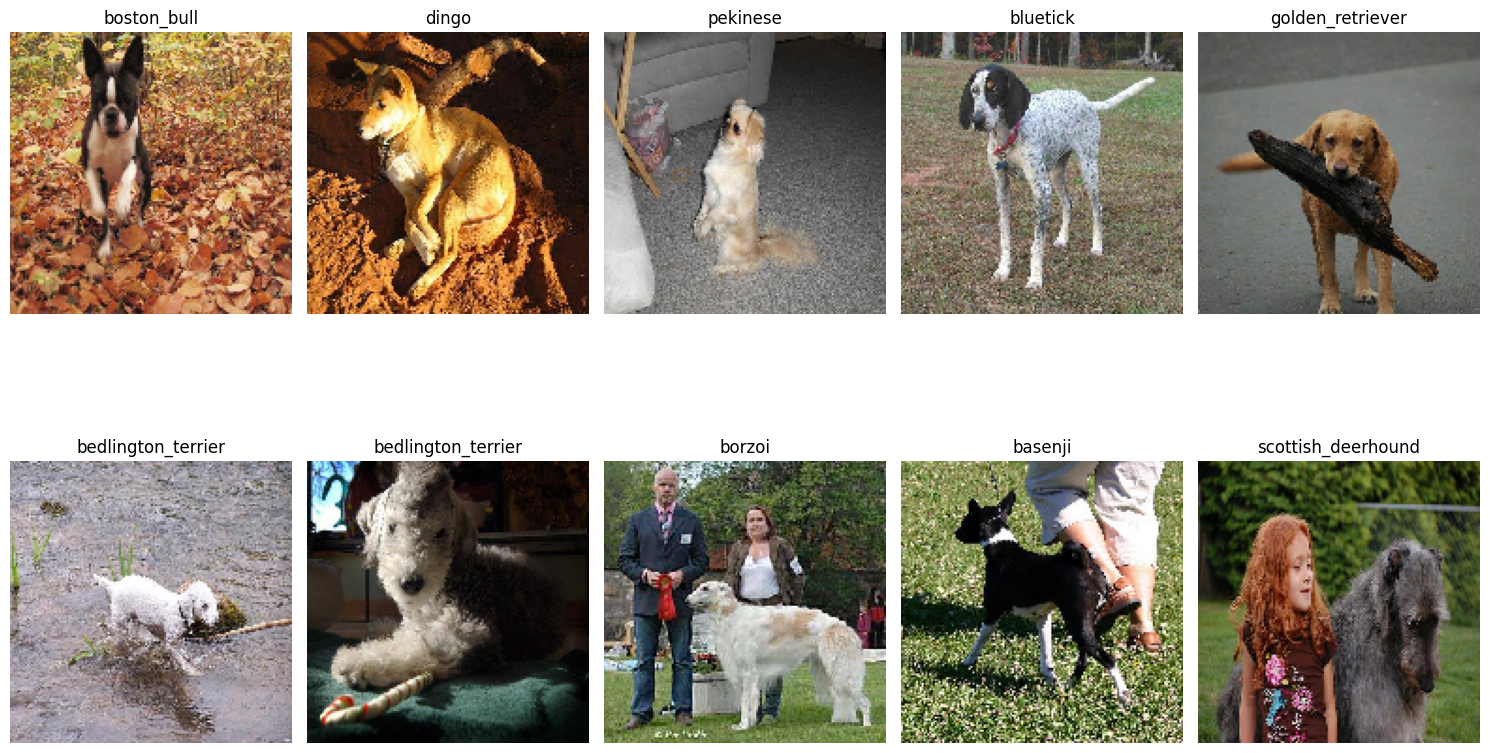

In [ ]:
# Show first 10 images with breed labels

plt.figure(figsize=(15,10))
for i, row in enumerate(labels_df[:10].itertuples(), 1):
    img_path = os.path.join(data_dir, 'train', row.id + '.jpg')
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150,150))
    plt.subplot(2, 5, i)
    plt.imshow(img)
    plt.title(row.breed)
    plt.axis('off')

plt.tight_layout()
plt.show()

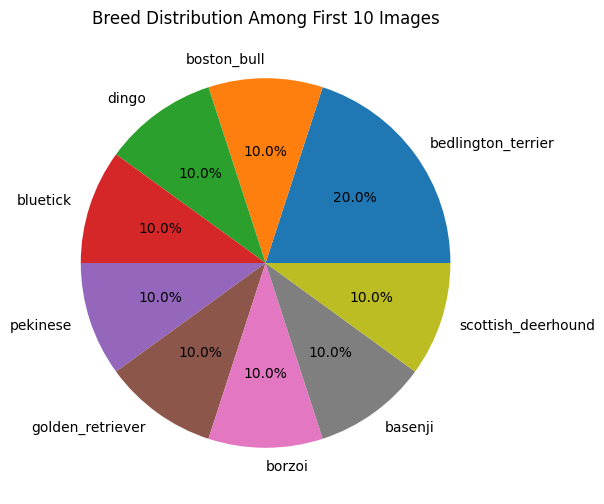

In [ ]:
# Breed distribution among first 10 images

first10_counts = labels_df['breed'][:10].value_counts()

# pie chart

first10_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Breed Distribution Among First 10 Images")
plt.ylabel("")  # Remove y-label
plt.show()

# **STEP-4: DATA AUGMENTATION AND NORMALIZATION** ( using TensorFlow Keras --> ImageDataGenerator())

In [ ]:
# data augmentation

import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# 1. Upload image
uploaded = files.upload()

# 2. Get the uploaded file path
image_path = list(uploaded.keys())[0]   # takes the first uploaded file
print("Uploaded file:", image_path)

# 3. Load image
img = load_img(image_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# 4. Define augmentations
# You need to define your data augmentation techniques here using ImageDataGenerator

# 5. Plot original + augmentations
# You need to define 'augmentations' variable here with a list of tuples (label, datagen)
# fig, axes = plt.subplots(len(augmentations), 2, figsize=(6, 30))

# for i, (label, datagen) in enumerate(augmentations):
#     # Original
#     axes[i, 0].imshow(img)
#     axes[i, 0].set_title("Original")
#     axes[i, 0].axis("off")

#     # Augmented
#     aug_iter = datagen.flow(x, batch_size=1)
#     aug_img = next(aug_iter)[0].astype("uint8")
#     axes[i, 1].imshow(aug_img)
#     axes[i, 1].set_title(label)
#     axes[i, 1].axis("off")

# plt.tight_layout()
# plt.show()

Saving 0a51fbac72fac75df279e18e4b1c042f.jpg to 0a51fbac72fac75df279e18e4b1c042f.jpg
Uploaded file: 0a51fbac72fac75df279e18e4b1c042f.jpg


Saving 0a51fbac72fac75df279e18e4b1c042f.jpg to 0a51fbac72fac75df279e18e4b1c042f (2).jpg
Uploaded file: 0a51fbac72fac75df279e18e4b1c042f (2).jpg


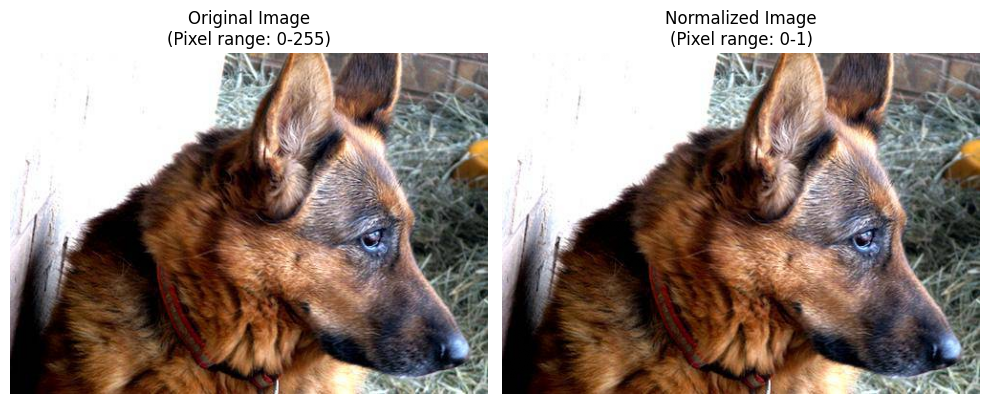

Original Image Pixel Range: min = 0 , max = 255
Normalized Image Pixel Range: min = 0.0 , max = 1.0


In [ ]:
# data normalization

import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab import files

# 1. Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]   # take first uploaded file
print("Uploaded file:", image_path)

# 2. Load image with OpenCV
original = cv2.imread(image_path)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# 3. Normalize (scale pixel values 0–1)
normalized = original / 255.0

# 4. Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original
axes[0].imshow(original)
axes[0].set_title("Original Image\n(Pixel range: 0-255)")
axes[0].axis("off")

# Normalized
axes[1].imshow(normalized)
axes[1].set_title("Normalized Image\n(Pixel range: 0-1)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

# 5. Print pixel value ranges
print("Original Image Pixel Range: min =", original.min(), ", max =", original.max())
print("Normalized Image Pixel Range: min =", normalized.min(), ", max =", normalized.max())

# **# STEP-5: DATA PREPARATION, LOADING & SPLITTING**

In [ ]:
# loading data (labels.csv)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pandas as pd
import os

base_path = "/content/drive/MyDrive/dog_breed_classification"

# Paths for train, test, and labels
train_dir = os.path.join(base_path, 'train')
test_dir = os.path.join(base_path, 'test')
labels_path = os.path.join(base_path, 'labels.csv')

# Load labels.csv
labels_all = pd.read_csv(labels_path)

In [ ]:
# Add '.jpg' extension to IDs
labels_all['id'] = labels_all['id'] + '.jpg'

# Split the data into training and validation sets

from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

train_df, val_df = train_test_split(
    labels_all, test_size=0.2, random_state=RANDOM_STATE, stratify=labels_all['breed']
)

In [ ]:
# defining constatnts
SIZE = (224, 224)
BATCH_SIZE = 32
RANDOM_STATE = 42
DROPOUT_RATE = 0.5
EPOCHS = 20
NUM_CLASSES = len(labels_all['breed'].unique())

In [ ]:
# ImageDataGenerators with augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,        # randomly rotate images (0–20 degrees)
    width_shift_range=0.2,    # randomly shift images horizontally (20%)
    height_shift_range=0.2,   # randomly shift images vertically (20%)
    shear_range=0.2,          # shear transformation
    zoom_range=0.2,           # zoom in/out
    horizontal_flip=True,     # randomly flip images horizontally
    fill_mode='nearest'       # fill pixels after rotation/shift
)

# Validation & Test: only rescale (normalization)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# **STEP-6: CREATING DATA GENERATORS (train, test, validation)**

In [ ]:
# Data Generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col='id',
    y_col='breed',
    target_size=SIZE,
    batch_size=BATCH_SIZE,

    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=train_dir,
    x_col='id',
    y_col='breed',
    target_size=SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Test data: test folder has no labels, so we use class_mode=None
test_generator = test_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'id': os.listdir(test_dir)}),
    directory=test_dir,
    x_col='id',
    y_col=None,
    target_size=SIZE,
    batch_size=BATCH_SIZE,
    class_mode=None,
    shuffle=False
)

Found 8177 validated image filenames belonging to 120 classes.
Found 2045 validated image filenames belonging to 120 classes.
Found 10358 validated image filenames.


In [ ]:
# Get mapping of classes → index
class_indices = train_generator.class_indices

# Convert it into a list in correct order
BREED_LABELS = list(class_indices.keys())

print("Number of classes:", len(BREED_LABELS))

Number of classes: 120


In [ ]:
import json

with open("breed_labels.json", "w") as f:
    json.dump(BREED_LABELS, f)

print("Saved breed_labels.json with", len(BREED_LABELS), "breeds.")

from google.colab import files
files.download("breed_labels.json")

Saved breed_labels.json with 120 breeds.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **STEP-7: IMPORTS AND SETUPS FOR MODEL TRAINING**

In [ ]:
# imports

import os
import pandas as pd
import numpy as np

# TensorFlow / Keras imports

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
# base model

input_tensor = Input(shape=(SIZE[0], SIZE[1], 3))
base_model = Xception(weights='imagenet', include_top=False, input_tensor=input_tensor)
base_model.trainable = False

# output layer

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(DROPOUT_RATE)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

# build model
model = Model(inputs=base_model.input, outputs=output)


# compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


# callbacks

early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1)
model_checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.3998 - loss: 2.8076
Epoch 1: val_loss improved from inf to 0.77853, saving model to model.h5


256/256 ━━━━━━━━━━━━━━━━━━━━ 174s 648ms/step - accuracy: 0.4004 - loss: 2.8037 - val_accuracy: 0.7770 - val_loss: 0.7785
Epoch 2/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.7199 - loss: 0.9602
Epoch 2: val_loss improved from 0.77853 to 0.71364, saving model to model.h5


256/256 ━━━━━━━━━━━━━━━━━━━━ 142s 554ms/step - accuracy: 0.7199 - loss: 0.9601 - val_accuracy: 0.7804 - val_loss: 0.7136
Epoch 3/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.7515 - loss: 0.8395
Epoch 3: val_loss did not improve from 0.71364
256/256 ━━━━━━━━━━━━━━━━━━━━ 141s 548ms/step - accuracy: 0.7515 - loss: 0.8395 - val_accuracy: 0.7829 - val_loss: 0.7141
Epoch 4/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.7695 - loss: 0.7689
Epoch 4: val_loss did not improve from 0.71364
256/256 ━━━━━━━━━━━━━━━━━━━━ 143s 558ms/step - accuracy: 0.7695 - loss: 0.7690 - val_accuracy: 0.7912 - val_loss: 0.7212
Epoch 5/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.7658 - loss: 0.7428
Epoch 5: val_loss did not improve from 0.71364
256/256 ━━━━━━━━━━━━━━━━━━━━ 142s 553ms/step - accuracy: 0.7658 - loss: 0.7427 - val_accuracy: 0.7824 - val_loss: 0.7230
Epoch 6/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.7873 - loss: 0.6792
Epoch 6: val_loss did n

# **STEP-9: SAVING & LOADING MODEL TO/FROM DRIVE**

In [ ]:
# saving the model to the google drive

model_save_path = '/content/drive/MyDrive/dog_breed_classification/model.h5'
model.save(model_save_path)

print(f"Model saved successfully to {model_save_path}")

Model saved successfully to /content/drive/MyDrive/dog_breed_classification/model.h5


In [ ]:
# check for succesfull saving of model

In [ ]:
# downloading the saved model from drive to system


In [ ]:
# loading the saved model from drive

from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/dog_breed_classification/model.h5'
loaded_model = load_model(model_path)

print("Model loaded successfully from Drive!")

Model loaded successfully from Drive!


In [ ]:
# training metrics of model

import numpy as np
from sklearn.metrics import precision_score, f1_score

# Step 1: Evaluate model to get loss & accuracy
val_loss, val_acc = loaded_model.evaluate(val_generator, verbose=0)

# Step 2: Predictions
y_true = val_generator.classes
y_pred_probs = loaded_model.predict(val_generator, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 3: Precision & F1
precision = precision_score(y_true, y_pred, average="weighted")  # or "macro"
f1 = f1_score(y_true, y_pred, average="weighted")

# Step 4: Print in percentage format
print("\nModel Evaluation Metrics")
print(f"Accuracy   : {val_acc * 100:.2f}%")
print(f"Loss       : {val_loss:.4f}")
print(f"Precision  : {precision * 100:.2f}%")
print(f"F1 Score   : {f1 * 100:.2f}%")


Model Evaluation Metrics
Accuracy   : 78.83%
Loss       : 0.7402
Precision  : 0.72%
F1 Score   : 0.72%


In [ ]:
# classification report for trained model

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Step 1: Evaluate basic accuracy & loss
val_loss, val_acc = model.evaluate(val_generator, verbose=0)
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# Step 2: Get predictions
y_true = val_generator.classes  # True labels
class_labels = list(val_generator.class_indices.keys())  # Class names

y_pred_probs = model.predict(val_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices

# Step 3: Generate classification report (Precision, Recall, F1)
report = classification_report(
    y_true,
    y_pred,
    target_names=class_labels,
    output_dict=True
)

# Convert to DataFrame for pretty display
report_df = pd.DataFrame(report).transpose()

print("\n===== Classification Report =====")
print(report_df.round(3))


Validation Accuracy: 0.7883
Validation Loss: 0.7402
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 231ms/step

===== Classification Report =====
                                precision  recall  f1-score  support
affenpinscher                       0.000   0.000     0.000    16.00
afghan_hound                        0.000   0.000     0.000    23.00
african_hunting_dog                 0.056   0.059     0.057    17.00
airedale                            0.000   0.000     0.000    22.00
american_staffordshire_terrier      0.000   0.000     0.000    15.00
...                                   ...     ...       ...      ...
wire-haired_fox_terrier             0.000   0.000     0.000    16.00
yorkshire_terrier                   0.000   0.000     0.000    16.00
accuracy                            0.010   0.010     0.010     0.01
macro avg                           0.010   0.010     0.010  2045.00
weighted avg                        0.010   0.010     0.010  2045.00

[123 rows x 4 columns]


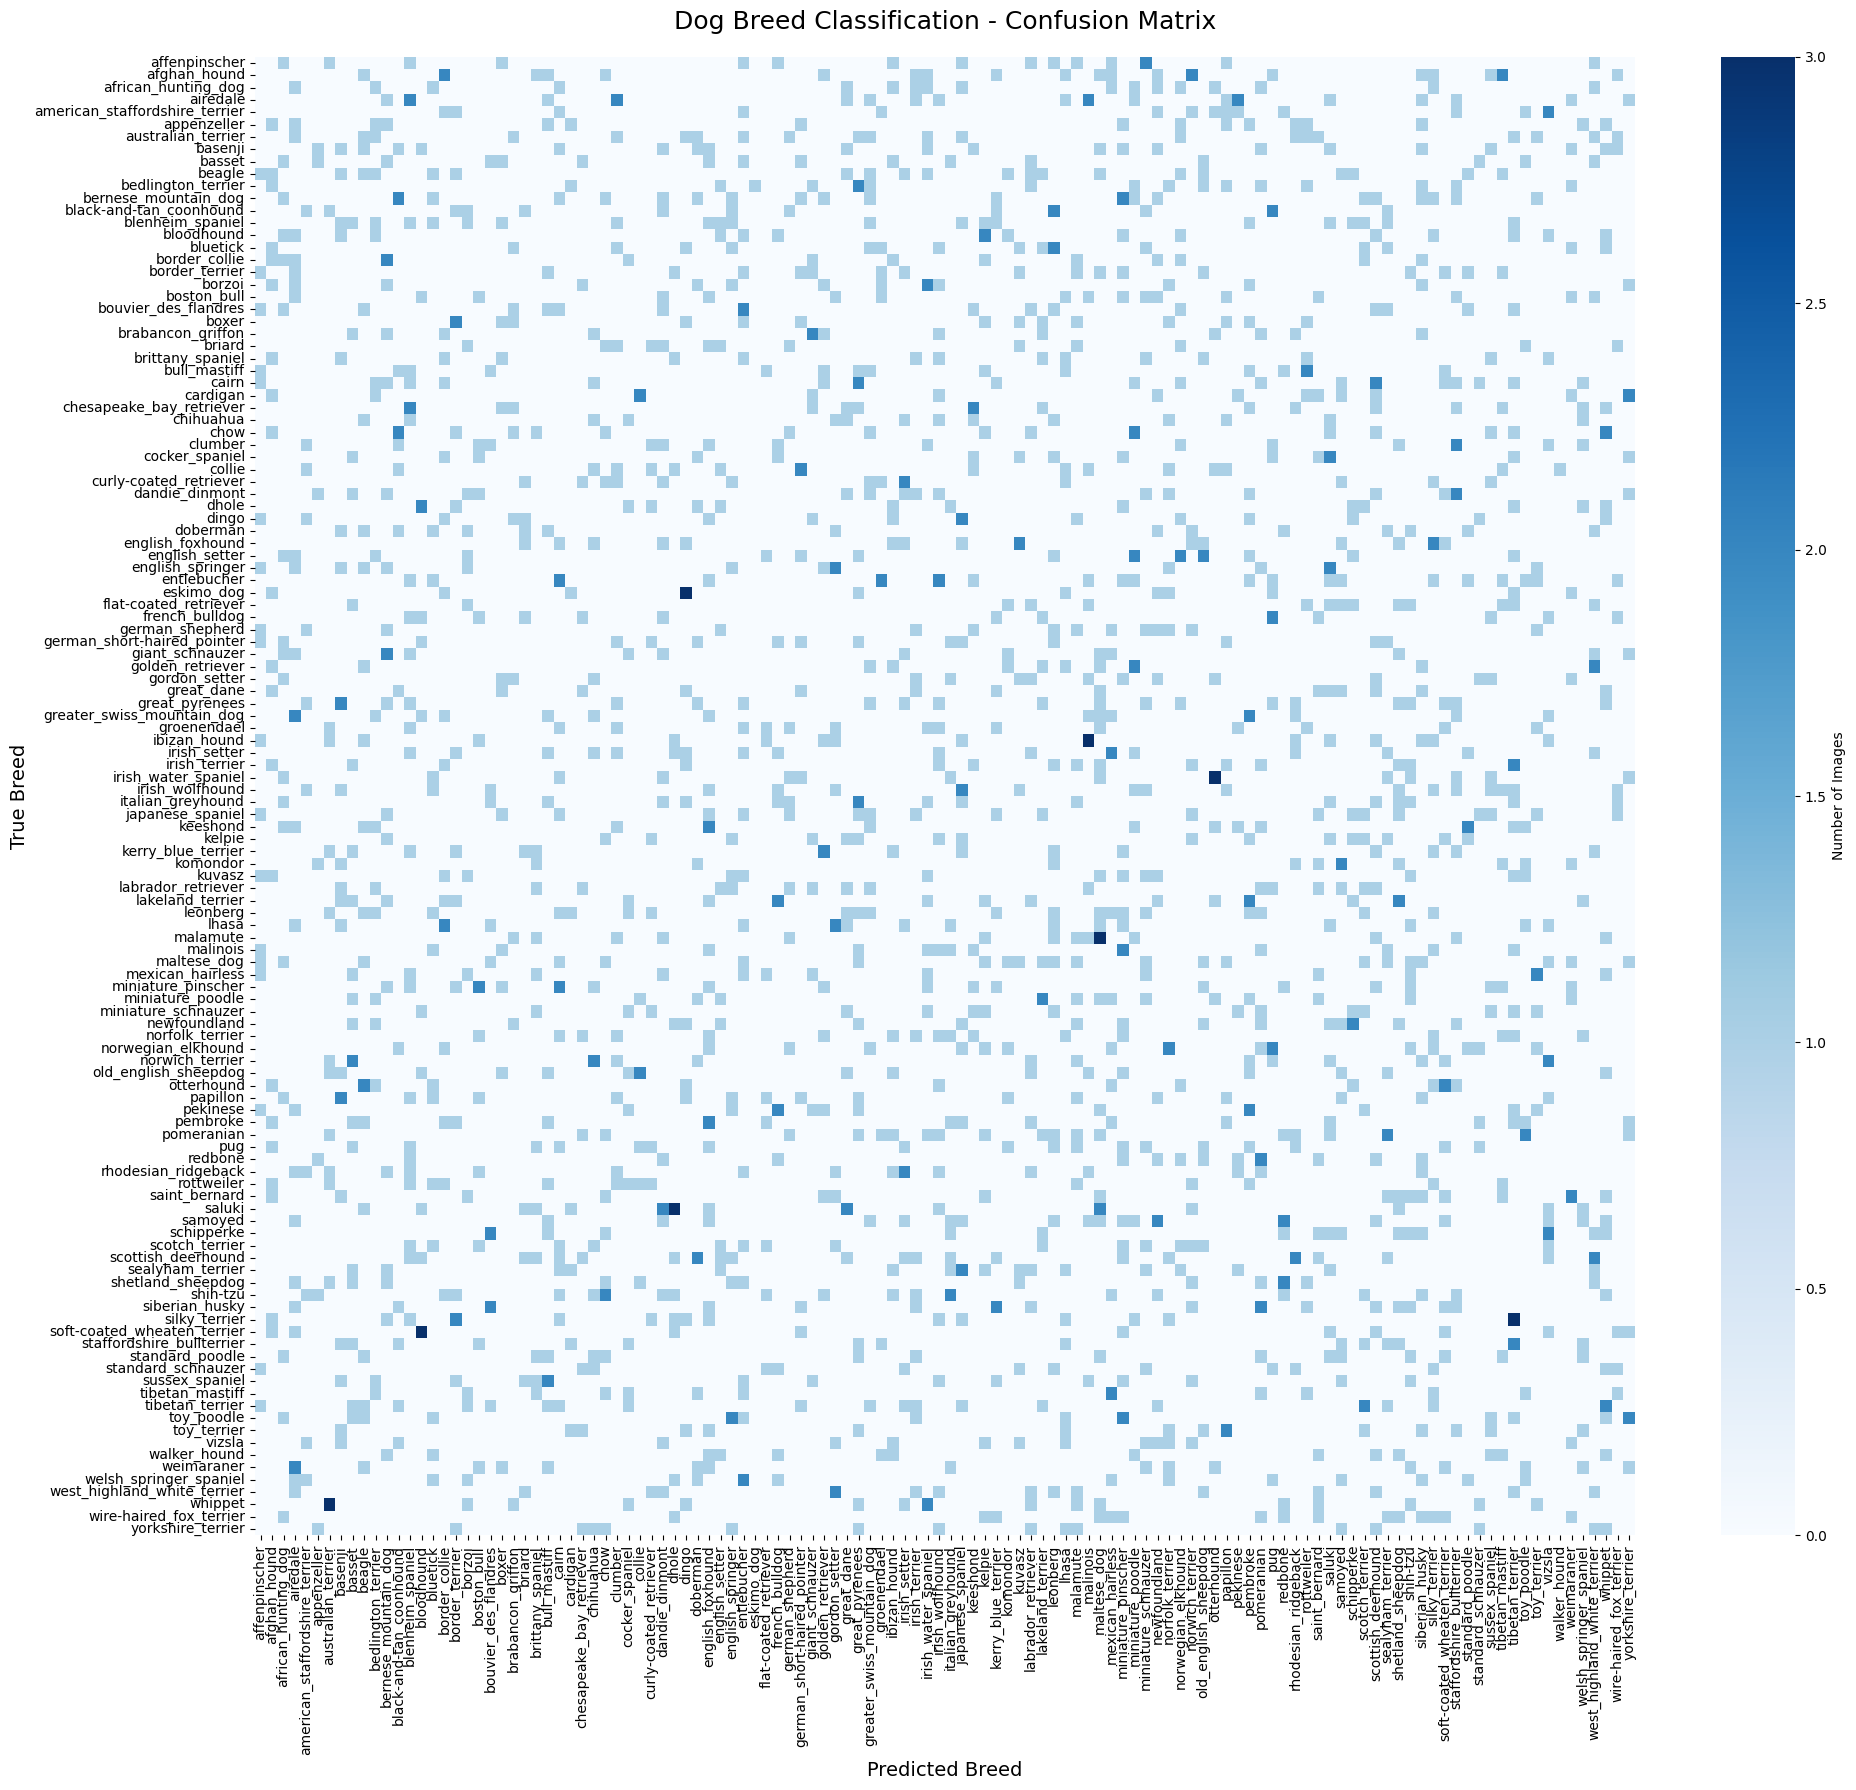

In [ ]:
# represent confusion matrix for trained model

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 1: Get predictions
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
classes = list(val_generator.class_indices.keys())  # class labels

# Step 3: Plot heatmap
plt.figure(figsize=(20, 18))  # adjust size as needed
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes,
            cbar_kws={'label': 'Number of Images'})

plt.title("Dog Breed Classification - Confusion Matrix", fontsize=18, pad=20)
plt.xlabel("Predicted Breed", fontsize=14)
plt.ylabel("True Breed", fontsize=14)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **STEP-11: PREDICTION FUNCTION FOR TRAINED MODEL**

Saving 0a6c192b96e55e2ca37318919b1ffae6.jpg to 0a6c192b96e55e2ca37318919b1ffae6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


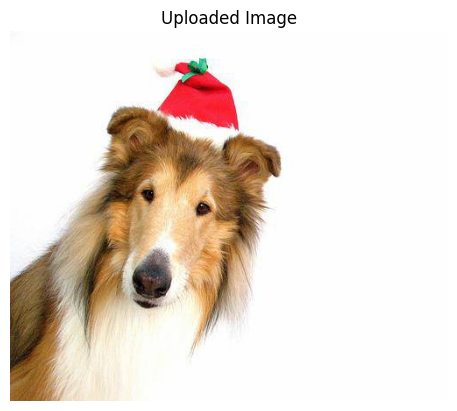

,Predicted Breed,Confidence (%)
0,collie,84.89%
1,shetland_sheepdog,14.95%
2,borzoi,0.10%


In [ ]:
# predicts top 3 most matching breed along woth confidence score

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from IPython.display import display
from tensorflow.keras.preprocessing import image

# 1. Upload custom file
uploaded = files.upload()

img_size = (224, 224) # Use the same size as trained model

for filename in uploaded.keys():
# 2. Read and preprocess image
    img = image.load_img(filename, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

# 3. Prediction
    predictions = loaded_model.predict(img_array)[0]

# 4. Get top 3 predictions
    top_3_indices = np.argsort(predictions)[::-1][:3]
    top_labels = [BREED_LABELS[i] for i in top_3_indices]
    top_scores = [predictions[i] * 100 for i in top_3_indices]

# 5. Show uploaded image
    plt.imshow(cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Uploaded Image")
    plt.show()

# 6. results shown in tabular format
    results_df = pd.DataFrame({
        "Predicted Breed": top_labels,
        "Confidence (%)": [f"{score:.2f}%" for score in top_scores]
    })

    styled_table = results_df.style.set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#4CAF50'),
                                           ('color', 'white'),
                                           ('font-size', '14px'),
                                           ('text-align', 'center'),
                                           ('border', '1px solid black')]},
        {'selector': 'tbody td', 'props': [('background-color', 'white'),
                                           ('color', 'black'),
                                           ('text-align', 'center'),
                                           ('font-size', '13px'),
                                           ('border', '1px solid black')]}
    ])

    display(styled_table)